<a href="https://colab.research.google.com/github/JANASREE-P/24ADI004_DSV_TEAM4/blob/main/24ADI204_TEAM4_WEEK3CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
df = pd.read_csv("Spotify_data.csv")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving Spotify_data.csv to Spotify_data (2).csv
User uploaded file "Spotify_data (2).csv" with length 459827 bytes


After uploading, you can then run the cell `df = pd.read_csv("Spotify_data.csv")` again. If the upload was successful, it should now find the file.

In [ ]:
df.isnull().sum()

,0
track_id,0
track_name,0
artist_name,0
album_name,1
release_date,0
genre,151
duration_ms,267
popularity,282
danceability,285
energy,281


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [ ]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [ ]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3902818140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()


,0
track_id,0
track_name,0
artist_name,0
album_name,0
release_date,0
genre,0
duration_ms,0
popularity,0
danceability,0
energy,0


In [ ]:
outlier_cols = ['popularity', 'danceability', 'energy', 'tempo', 'loudness']
z_scores = np.abs(stats.zscore(df[outlier_cols]))

df['outlier_flag'] = (z_scores > 3).any(axis=1)
df['outlier_flag'].value_counts()


,count
outlier_flag,
False,2936
True,63


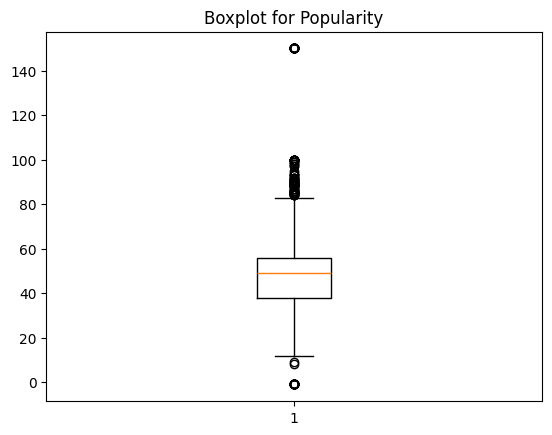

In [ ]:
plt.boxplot(df['popularity'])
plt.title("Boxplot for Popularity")
plt.show()


In [ ]:
z_scores = np.abs(stats.zscore(df[num_cols]))


In [ ]:
df = df[(z_scores < 3).all(axis=1)]


In [ ]:
df.shape


(2826, 20)

In [ ]:
df.to_csv("Spotify_data_cleaned.csv", index=False)


In [ ]:
from google.colab import files
files.download("Spotify_data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(2826, 20)